In [1]:
import numpy as np
import pandas as pd
import os
import glob
import string
import re
from matplotlib import pyplot
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Dyass\\Desktop\\ML-PA3'

In [3]:
def dataLoader(dataType):
    '''function to load the data'''
    tList = []
    label = []
    for name in glob.glob(os.getcwd()+"//Dataset//"+dataType+"//neg//*"):
        with open(name,encoding="utf8") as f:
            text = f.readlines()
            tList.append(text[0])
            label.append(0)
    
    for name in glob.glob(os.getcwd()+"//Dataset//"+dataType+"//pos//*"):
        with open(name,encoding="utf8") as f:
            text = f.readlines()
            tList.append(text[0])
            label.append(1)
    
    df = pd.DataFrame(list(zip(tList,label)),columns = ["Text","Label"])
    return df
    
    

In [4]:
def loadPositveNegativeStop():
    '''function to load pos,neg and stop words'''
    pos = []
    neg = []
    stop = []
    
    for name in glob.glob(os.getcwd()+"//Dataset//negative_words.txt"):
        with open(name) as f:
            lines = f.readlines()
            for line in lines:
                neg.append(line.strip())
                
    for name in glob.glob(os.getcwd()+"//Dataset//positive_words.txt"):
        with open(name,encoding="utf8") as f:
            lines = f.readlines()
            for line in lines:
                pos.append(line.strip())
                
    for name in glob.glob(os.getcwd()+"//Dataset//stop_words.txt"):
        with open(name,encoding="utf8") as f:
            lines = f.readlines()
            for line in lines:
                stop.append(line.strip())
    
    return pos,neg,stop
    

In [5]:
pos,neg,stop = loadPositveNegativeStop()
pos

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [6]:
test = dataLoader("test")
train = dataLoader("train")

In [7]:
def preprocessing(text):
    '''function to process the data'''
    
    #lowercasing
    text = text.lower()
    
    #removing everything except alphabets
    text = re.sub("[^a-zA-Z]", " ",text) 
    
    for word in stop:
        #removing stopwords using regex
        regex = r'\b'+word+r'\b'
        text = re.sub(regex," ",text)
    
    #removing punctuation
    for word in string.punctuation:
        text = text.replace(word," ")
    
    text = text.strip()
    return text
    
    

In [8]:
train['Ptext'] = train['Text'].apply(preprocessing)
test['Ptext'] = test['Text'].apply(preprocessing)


In [9]:
def featureCreatorPositive(text):
    #secod feature is count of positive words
    #third feature is count of negative words
    count = 0 
    text = text.split()
    for word in text:
        if word in pos:
            count+=1
    return count
        
    
    return count
def featureCreatorNegative(text):
    count = 0 
    text = text.split()
    for word in text:
        if word in neg:
            count+=1
    return count 

def featureCreateOne(text):
    return 1



In [10]:
train['pos'] = train['Ptext'].apply(featureCreatorPositive)
train['neg'] = train['Ptext'].apply(featureCreatorNegative)
train['one'] = train['Ptext'].apply(featureCreateOne) 

In [11]:
test['pos'] = test['Ptext'].apply(featureCreatorPositive)
test['neg'] = test['Ptext'].apply(featureCreatorNegative)
test['one'] = test['Ptext'].apply(featureCreateOne) 

In [12]:
train.to_pickle("train.pkl")
test.to_pickle("test.pkl")

In [13]:
XTrain = train[['one','pos','neg']]
YTrain = train[['Label']]

In [14]:
XTest = test[['one','pos','neg']]
YTest = test[['Label']]

In [15]:
XTest

,one,pos,neg
0,1,6,4
1,1,12,11
2,1,5,12
3,1,14,13
4,1,17,14
...,...,...,...
24995,1,13,0
24996,1,6,4
24997,1,33,24
24998,1,11,5


In [16]:
# train = pd.read_pickle("train.pkl")
# test = pd.read_pickle("test.pkl")

In [77]:
class LogisticRegression(object):
    def __init__(self,XTrain,YTrain,XTest,YTest,lr=0.01,epochs=1500):
        
        '''function to initialize variables'''
        
        self.XTrain = XTrain.to_numpy()
        self.YTrain = YTrain.to_numpy()
        self.XTest = XTest.to_numpy()
        self.YTest = YTest.to_numpy()
        self.W = np.zeros((1,self.XTrain.shape[1]))
        self.lr = lr
        self.epochs = epochs
#         print(self.YTest.shape)
        self.batchGradientDescent(self.XTrain,self.YTrain)
        self.predict(self.XTest,self.YTest)
    
    def sigmoid(self,x):
        '''sigmoid function'''
        
        return 1/(1+np.exp(-x))
    
    def forward(self,X):
        '''function to pass data through model'''
        
        z = np.dot(X,self.W.T)
        y = self.sigmoid(z)
        return y 
    
    def batchGradientDescent(self,X,Y):
        '''function to perform batch gradient descent for self.epochs and plot loss'''
        
        loss = []
        accuracy = []
        for i in range(self.epochs):
            m = X.shape[0]
            h_x = self.forward(X)
            
            error = h_x-Y
            dw = 1/m*(error.T@X)
            
            self.W = self.W - self.lr*dw 
            loss.append(self.crossentropy(h_x,Y))
            
            h_x = np.where(h_x<=0.5,0,1)
            accuracy.append(np.mean(h_x==Y)*100)
        
        pyplot.xlabel("epochs")
        pyplot.ylabel("training loss")
        pyplot.title("Evolution of training loss")
        pyplot.plot(list(range(0,self.epochs)),loss)
            
            
    def predict(self,X,Y):
        '''function to predict the test data'''
        
        h_x = self.forward(X)
        
        h_x = np.where(h_x<=0.5,0,1)
        
        print("Accuracy on test=",np.mean(h_x==Y)*100)
        print("Confusion matrix for testing data=")
        self.confusionMatrix(h_x,Y)

    
    def crossentropy(self,ypred,ytrue):
        '''function to calculate loss. Epsilon is added to avoid nan errors'''
        m = ypred.shape[0]
        epsilon = 1e-6
        first = -1/m*np.sum(ytrue*np.log(ypred+epsilon)+(1-ytrue)*np.log(1-ypred+epsilon))    
        return first
    
    def confusionMatrix(self,ypred,ytrue):
        '''function to calculate confusion matrix'''
        tp = 0 
        tn = 0
        fp = 0
        fn = 0
        
        ypred = np.where(ypred<=0.5,0,1)
        
        for x,y in zip(ypred,ytrue):
            
            if x==1 and y==1:
                tp+=1
            
            if x==0 and y==0:
                tn+=1
                
            if x==1 and y==0:
                fn+=1
            if x==0 and y==1:
                fp+=1
                
        
        
        cm = np.array([[tp,fp],[fn,tn]])
        print(cm)
            
        
    

Accuracy on test= 73.408
Confusion matrix for testing data=
[[9316 3184]
 [3464 9036]]


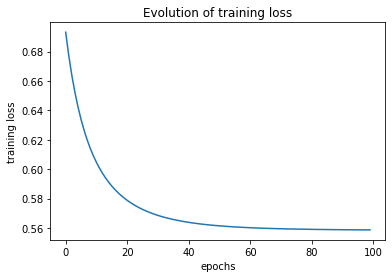

In [78]:
L = LogisticRegression(XTrain,YTrain,XTest,YTest,epochs=100)

In [19]:
#############################
#PART 2
#############################
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [20]:
XTrain_array = XTrain.to_numpy()
YTrain_array = (YTrain.to_numpy()).ravel()

XTest_array = XTest.to_numpy()
YTest_array = (YTrain.to_numpy()).ravel()

In [40]:
model = LogisticRegression(fit_intercept=False,solver='lbfgs').fit(XTrain_array,YTrain_array)

In [41]:
ypred = model.predict(XTest_array)
acc = accuracy_score(YTest_array,ypred)
print("Classification accuracy on test set is:",acc*100)

Classification accuracy on test set is: 73.056


In [42]:
print("Confusion matrix for test set is = ")
print(confusion_matrix(YTest_array,ypred))

Confusion matrix for test set is = 
[[9225 3275]
 [3461 9039]]
